<a href="https://colab.research.google.com/github/gyanigk/ML-HW4/blob/main/language_features-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re

#Loading the dataset and parsing the required information from the dataset.

In [32]:
# Reading in data
prosodic_file = "https://raw.githubusercontent.com/gyanigk/ML-HW4/refs/heads/main/data/prosodic_features.csv"
scores_file = "https://raw.githubusercontent.com/gyanigk/ML-HW4/refs/heads/main/data/scores.csv"
transcript_file = "https://raw.githubusercontent.com/gyanigk/ML-HW4/refs/heads/main/data/transcripts.csv"

# Read csvs into a file
prosodic_data = pd.read_csv(prosodic_file)
scores_data = pd.read_csv(scores_file)
transcript_data = pd.read_csv(transcript_file)

# Add a column that corresponds to participant for easy splitting for prosodic data
prosodic_data['Participant'] = prosodic_data['participant&question'].str.extract(r'^(PP?\d+)')
prosodic_data['Participant'] = prosodic_data['Participant'].str.lower()
# Make the entire transcript lower case
transcript_data['transcript'] = transcript_data['transcript'].str.lower()
transcript_data.rename(columns={'pid': 'Participant'}, inplace=True)

In [12]:
prosodic_data.head()

,participant&question,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,Participant
0,P1Q1,51.952125,0.015331,75.232657,396.635613,127.989222,27.821528,217.628692,119.690367,0.773830,...,0.42117,0.000342,55,1.290667,0.494,27.176,138,274.562,257.247,p1
1,P1Q2,38.677312,0.015185,75.165527,397.613041,131.067490,26.452853,195.852246,124.820583,0.717333,...,0.38674,0.000444,40,1.866667,0.522,20.875,100,268.613,270.193,p1
2,P1Q3,43.593896,0.014680,71.034761,395.930688,127.739086,26.006330,189.441737,120.457848,1.068376,...,0.43099,0.000475,44,2.624000,0.505,22.229,114,283.912,203.506,p1
3,P1Q4,23.435813,0.008920,74.938673,248.733738,129.563914,19.334327,103.024640,124.473851,1.121487,...,0.46003,0.000907,24,2.933333,0.507,12.171,55,100.655,83.172,p1
4,P1Q5,13.274833,0.003432,93.949854,263.669188,130.178482,26.595483,174.934601,120.272480,1.078493,...,0.46576,0.001570,12,2.848000,0.628,7.541,32,129.591,117.119,p1


In [33]:
transcript_data.head()

,Participant,transcript,Question,Answer
0,p1,interviewer: so how are you doing?|interviewee...,NaN,NaN
1,p10,interviewer: so how you doing?|interviewee: g...,NaN,NaN
2,p11,interviewer: so tell me about yourself. |inte...,NaN,NaN
3,p12,interviewer: so how are you doing today?|inter...,NaN,NaN
4,p13,interviewer: how are you doing today?|intervie...,NaN,NaN


In [34]:
transcript_data.shape

(138, 4)

In [35]:
scores_data.head()

,Participant,Overall,Excited
0,p1,5.297316,5.043890
1,p3,4.414892,5.601586
2,p4,4.494494,4.261343
3,p5,5.457670,4.707062
4,p6,5.106512,4.648259


In [36]:
transcript_data = pd.merge(transcript_data, scores_data, on='Participant')
transcript_data.head()

,Participant,transcript,Question,Answer,Overall,Excited
0,p1,interviewer: so how are you doing?|interviewee...,NaN,NaN,5.297316,5.043890
1,p10,interviewer: so how you doing?|interviewee: g...,NaN,NaN,4.725115,4.383947
2,p11,interviewer: so tell me about yourself. |inte...,NaN,NaN,5.010430,4.297760
3,p12,interviewer: so how are you doing today?|inter...,NaN,NaN,5.038526,5.322526
4,p13,interviewer: how are you doing today?|intervie...,NaN,NaN,4.251251,3.579510


In [37]:
# Splitting the participants into 5 folds
num_folds = 5

# Grab participant numbers from the scores csv file
interviews = scores_data['Participant'].unique()
participants = list(set([re.sub(r'^pp?|q\d+', '', item) for item in interviews]))
random.shuffle(participants)
participant_folds = [participants[i::num_folds] for i in range(num_folds)]

for i, fold in enumerate(participant_folds):
  print(f"Fold {i + 1}: {fold}")
  print("\tLength: ", len(fold))

# Grab all the correct interview names associated with each participant
interview_folds = []
for fold in participant_folds:
  interview_folds.append([item for num in fold for item in (f"p{num}", f"pp{num}")])

Fold 1: ['60', '69', '10', '34', '29', '32', '7', '55', '15', '52', '5', '85', '11', '49']
	Length:  14
Fold 2: ['63', '27', '42', '1', '35', '62', '56', '8', '67', '6', '89', '76', '72', '37']
	Length:  14
Fold 3: ['53', '65', '13', '81', '44', '74', '58', '16', '3', '20', '30', '70', '79', '24']
	Length:  14
Fold 4: ['61', '25', '78', '4', '33', '83', '66', '43', '12', '31', '86', '73', '57', '64']
	Length:  14
Fold 5: ['71', '59', '14', '80', '50', '84', '17', '77', '48', '47', '45', '21', '22']
	Length:  13


In [84]:
def get_data_splits(data, fold_number):
    """
    Split data into training, validation, and testing sets based on a specified fold.

    Parameters:
        data (DataFrame): The complete dataset.
        fold_number (int): The fold to use for testing (0-based index).

    Returns:
        tuple: (training_set, validation_set, testing_set)
    """
    # Quick check on fold number
    assert 0 <= fold_number < len(interview_folds), "Fold_number must be between 0 and len(folds) - 1"

    # Split the data
    test_set = data[data['Participant'].isin( interview_folds[fold_number] )]
    val_set = data[data['Participant'].isin( interview_folds[(fold_number + 1) % len(interview_folds)] )]
    train_set_parts = [item for i, fold in enumerate(interview_folds) if i not in [fold_number, (fold_number + 1) % len(interview_folds)] for item in fold]
    train_set = data[data['Participant'].isin(train_set_parts)]

    return train_set, val_set, test_set

train_set, val_set, test_set = get_data_splits(prosodic_data, 0)
print("Prosodic Data: ")
print(train_set.shape, " ", val_set.shape, " ", test_set.shape)
train_set, val_set, test_set = get_data_splits(scores_data, 0)
print("Scores Data: ")
print(train_set.shape, " ", val_set.shape, " ", test_set.shape)
# print(test_set.head())
train_set, val_set, test_set = get_data_splits(transcript_data, 0)
print("Transcript Data: ")
print(train_set.shape, " ", val_set.shape, " ", test_set.shape)
# print(test_set.head())

Prosodic Data: 
(410, 37)   (140, 37)   (140, 37)
Scores Data: 
(82, 3)   (28, 3)   (28, 3)
Transcript Data: 
(82, 7)   (28, 7)   (28, 7)


In [85]:
train_set.head()

,Participant,transcript,Question,Answer,Overall,Excited,Processed Transcript
3,p12,interviewer: so how are you doing today?|inter...,NaN,NaN,5.038526,5.322526,"[so how are you doing today?, i'm good how ar..."
4,p13,interviewer: how are you doing today?|intervie...,NaN,NaN,4.251251,3.579510,"[how are you doing today?, good., good. so wh..."
5,p14,interviewer: so how are you doing today|inter...,NaN,NaN,5.801354,5.204619,"[so how are you doing today, good how are yo..."
7,p16,interviewer: great so how are you doing today...,NaN,NaN,5.181994,6.049929,"[great so how are you doing today?, very good..."
8,p17,interviewer: how are you doing today?|intervie...,NaN,NaN,4.332305,4.323937,"[how are you doing today?, doing well. how are..."


In [81]:
transcript_data.head()

,Participant,transcript,Question,Answer,Overall,Excited,Processed Transcript
0,p1,interviewer: so how are you doing?|interviewee...,NaN,NaN,5.297316,5.043890,"[so how are you doing?, im pretty good., ok we..."
1,p10,interviewer: so how you doing?|interviewee: g...,NaN,NaN,4.725115,4.383947,"[so how you doing?, great how about you?, i'..."
2,p11,interviewer: so tell me about yourself. |inte...,NaN,NaN,5.010430,4.297760,"[so tell me about yourself. , uhh i’m a juni..."
3,p12,interviewer: so how are you doing today?|inter...,NaN,NaN,5.038526,5.322526,"[so how are you doing today?, i'm good how ar..."
4,p13,interviewer: how are you doing today?|intervie...,NaN,NaN,4.251251,3.579510,"[how are you doing today?, good., good. so wh..."


Extracting language features

In [16]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [25]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import torch
from transformers import BertTokenizer, BertModel

nltk.download('punkt')  # Tokenizer
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')  # POS Tagger
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon') # Vader

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Syntactic Vectorization with CountVectorizer


In [39]:
# Remove common stop words in english and ignore words that appear fewer than 2 times
vectorizer = CountVectorizer(stop_words='english', min_df=2)
count_matrix = vectorizer.fit_transform(transcript_data['transcript'])

# Convert from sparse X matrix to a denser one for easy use
X_dense = count_matrix.toarray()
feature_names_count = vectorizer.get_feature_names_out()

word_count = pd.DataFrame(X_dense, columns=feature_names_count)
print(word_count.shape)
word_count.head()

(138, 2464)


,000,10,100,13,14,15,16,18,20,200,...,yep,yes,yo,yoga,york,young,younger,youngest,yup,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Syntactic Vectorization with TFIDF Vectorizer


In [40]:
# Syntactic vectorizer: TFIDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', min_df=2)
tfidf_matrix = tfidf.fit_transform(transcript_data['transcript'])
feature_names_tf = tfidf.get_feature_names_out()
tfidf_count = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names_tf)
print(tfidf_count.shape)
tfidf_count.head()

(138, 2464)


,000,10,100,13,14,15,16,18,20,200,...,yep,yes,yo,yoga,york,young,younger,youngest,yup,zone
0,0.068513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.031465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Statistical Features (word count and average word length)


In [41]:

# Statistical Features (word count and average word length)

# Word Count for the entire interview
features = pd.DataFrame()
features['word_count'] = transcript_data['transcript'].apply(lambda x: len(x.split()))

# Average word length for the interview
features['avg_word_length'] = transcript_data['transcript'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

features.head()

,word_count,avg_word_length
0,613,4.438825
1,1118,4.510733
2,751,4.528628
3,717,4.281729
4,645,4.688372


Part of speech tagging

In [42]:
from collections import Counter

# Part of speech tagging
features['pos tagging'] = transcript_data['transcript'].apply(lambda x: pos_tag(word_tokenize(x)))
features['pos tagging'].head()
# NN: Noun singular
# VB: Verb base form
# JJ: Adjective
# RB: Adverb
# DT: Determiner
# IN: Preposition or subordination conjunction
# Count POS tags

def pos_tag_counter(pos_tags):
    tags = [tag for _, tag in pos_tags]  # Extract tags only
    return Counter(tags)

# Apply to generate a Counter for each transcript
features['pos_tag_counts'] = features['pos tagging'].apply(pos_tag_counter)


# Get a list of all unique POS tags in the dataset
all_pos_tags = set(tag for tags in features['pos_tag_counts'] for tag in tags.keys())

# Convert counts to a feature matrix
pos_tag_matrix = pd.DataFrame(list(features['pos_tag_counts'].apply(lambda x: {tag: x.get(tag, 0) for tag in all_pos_tags})))

# Combine with the original features
features = pd.concat([features, pos_tag_matrix], axis=1)


In [45]:
features.head()

,word_count,avg_word_length,pos tagging,pos_tag_counts,.,JJ,NN,RBS,PDT,RBR,...,FW,NNP,VBD,WP$,JJS,TO,DT,VBG,'',EX
0,613,4.438825,"[(interviewer, NN), (:, :), (so, RB), (how, WR...","{'NN': 129, ':': 18, 'RB': 49, 'WRB': 9, 'VBP'...",11,48,129,0,1,0,...,0,0,22,1,1,17,48,10,0,1
1,1118,4.510733,"[(interviewer, NN), (:, :), (so, RB), (how, WR...","{'NN': 210, ':': 40, 'RB': 71, 'WRB': 10, 'PRP...",35,116,210,0,0,1,...,0,6,55,0,7,39,93,33,0,3
2,751,4.528628,"[(interviewer, NN), (:, :), (so, RB), (tell, V...","{'NN': 155, ':': 13, 'RB': 51, 'VB': 42, 'PRP'...",31,78,155,0,2,4,...,0,0,22,0,1,23,59,21,0,0
3,717,4.281729,"[(interviewer, NN), (:, :), (so, RB), (how, WR...","{'NN': 137, ':': 24, 'RB': 38, 'WRB': 11, 'VBP...",36,58,137,0,0,1,...,0,0,29,0,0,26,60,22,0,1
4,645,4.688372,"[(interviewer, NN), (:, :), (how, WRB), (are, ...","{'NN': 125, ':': 21, 'WRB': 6, 'VBP': 22, 'PRP...",30,50,125,0,0,2,...,0,0,40,0,1,15,49,17,0,0


In [46]:
features.shape

(138, 43)

In [47]:
features.drop('pos tagging', axis=1, inplace=True)

In [48]:
features.drop('pos_tag_counts', axis=1, inplace=True)

In [49]:
features.head()

,word_count,avg_word_length,.,JJ,NN,RBS,PDT,RBR,WDT,RP,...,FW,NNP,VBD,WP$,JJS,TO,DT,VBG,'',EX
0,613,4.438825,11,48,129,0,1,0,6,5,...,0,0,22,1,1,17,48,10,0,1
1,1118,4.510733,35,116,210,0,0,1,11,6,...,0,6,55,0,7,39,93,33,0,3
2,751,4.528628,31,78,155,0,2,4,6,6,...,0,0,22,0,1,23,59,21,0,0
3,717,4.281729,36,58,137,0,0,1,1,4,...,0,0,29,0,0,26,60,22,0,1
4,645,4.688372,30,50,125,0,0,2,4,3,...,0,0,40,0,1,15,49,17,0,0


In [50]:
features.corrwith(transcript_data['Overall'])

,0
word_count,0.157900
avg_word_length,-0.192453
.,-0.000018
JJ,0.080719
NN,0.126663
RBS,0.079647
PDT,0.121022
RBR,-0.024108
WDT,0.256721
RP,0.137538


Sentiment Analysis with Vader


In [51]:
# Sentiment Analysis with Vader
analyzer = SentimentIntensityAnalyzer()
features['sentiment'] = transcript_data['transcript'].apply(lambda x: analyzer.polarity_scores(x))

features['sentiment'].head()

,sentiment
0,"{'neg': 0.013, 'neu': 0.859, 'pos': 0.128, 'co..."
1,"{'neg': 0.026, 'neu': 0.852, 'pos': 0.122, 'co..."
2,"{'neg': 0.02, 'neu': 0.874, 'pos': 0.105, 'com..."
3,"{'neg': 0.027, 'neu': 0.842, 'pos': 0.131, 'co..."
4,"{'neg': 0.038, 'neu': 0.838, 'pos': 0.124, 'co..."


In [52]:
# Expand the sentiment scores into separate columns
sentiment_df = features['sentiment'].apply(pd.Series)

# Add the sentiment columns back to the main feature DataFrame
features = pd.concat([features, sentiment_df], axis=1)

# Drop the original dictionary column if no longer needed
features.drop('sentiment', axis=1, inplace=True)

# Display the updated feature DataFrame
features.head()

,word_count,avg_word_length,.,JJ,NN,RBS,PDT,RBR,WDT,RP,...,JJS,TO,DT,VBG,'',EX,neg,neu,pos,compound
0,613,4.438825,11,48,129,0,1,0,6,5,...,1,17,48,10,0,1,0.013,0.859,0.128,0.9955
1,1118,4.510733,35,116,210,0,0,1,11,6,...,7,39,93,33,0,3,0.026,0.852,0.122,0.9988
2,751,4.528628,31,78,155,0,2,4,6,6,...,1,23,59,21,0,0,0.020,0.874,0.105,0.9966
3,717,4.281729,36,58,137,0,0,1,1,4,...,0,26,60,22,0,1,0.027,0.842,0.131,0.9978
4,645,4.688372,30,50,125,0,0,2,4,3,...,1,15,49,17,0,0,0.038,0.838,0.124,0.9945


In [53]:
features.corrwith(transcript_data['Overall'])

,0
word_count,0.157900
avg_word_length,-0.192453
.,-0.000018
JJ,0.080719
NN,0.126663
RBS,0.079647
PDT,0.121022
RBR,-0.024108
WDT,0.256721
RP,0.137538


Word Embeddings with BERT


In [54]:
# Word embeddings with BERT (Hugging Face)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [75]:
# Separate interveiw into sentences
def process_transcript(text):
  sentences = re.split(r'(?<=\|)', text)
  cleaned_sentences = [
    re.sub(r'^(interviewer:|interviewee:)\s*', '', s.strip().replace('|', '')) for s in sentences if s.strip()
  ]
  return cleaned_sentences

transcript_data['Processed Transcript'] = transcript_data['transcript'].apply(process_transcript)

def get_bert_embeddings(sentences):
    embeddings = []
    for sentence in sentences:
        # Tokenize and get input Id and attention mask
        inputs = tokenizer(sentence, return_tensors="pt", padding="max_length", truncation=True, max_length=20)

        # Use BERT
        with torch.no_grad():
            outputs = model(**inputs)

        # Pool output
        cls_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
        embeddings.append(cls_embedding)

    # Combine sentence embeddings into a single 768-dimensional vector
    transcript_embedding = np.mean(embeddings, axis=0)  # Take the mean of all sentence embeddings
    return transcript_embedding

features['word embeddings'] = transcript_data['Processed Transcript'].apply(get_bert_embeddings)

features['word embeddings'].head()

,word embeddings
0,"[0.017016187, -0.034937337, 0.14796308, -0.000..."
1,"[0.10268941, -0.08198997, 0.27217576, 0.043742..."
2,"[0.15770096, -0.117634885, 0.053557727, 0.0065..."
3,"[0.16491431, -0.16346881, 0.18370056, -0.02423..."
4,"[0.05813729, -0.097823314, 0.14181888, -0.0148..."


In [76]:
features.head()

,word_count,avg_word_length,.,JJ,NN,RBS,PDT,RBR,WDT,RP,...,TO,DT,VBG,'',EX,neg,neu,pos,compound,word embeddings
0,613,4.438825,11,48,129,0,1,0,6,5,...,17,48,10,0,1,0.013,0.859,0.128,0.9955,"[0.017016187, -0.034937337, 0.14796308, -0.000..."
1,1118,4.510733,35,116,210,0,0,1,11,6,...,39,93,33,0,3,0.026,0.852,0.122,0.9988,"[0.10268941, -0.08198997, 0.27217576, 0.043742..."
2,751,4.528628,31,78,155,0,2,4,6,6,...,23,59,21,0,0,0.020,0.874,0.105,0.9966,"[0.15770096, -0.117634885, 0.053557727, 0.0065..."
3,717,4.281729,36,58,137,0,0,1,1,4,...,26,60,22,0,1,0.027,0.842,0.131,0.9978,"[0.16491431, -0.16346881, 0.18370056, -0.02423..."
4,645,4.688372,30,50,125,0,0,2,4,3,...,15,49,17,0,0,0.038,0.838,0.124,0.9945,"[0.05813729, -0.097823314, 0.14181888, -0.0148..."


In [77]:
features['word embeddings'].iloc[3].shape

(768,)

In [78]:
word_embeddings = features['word embeddings']


# Function to pad or truncate embeddings
def pad_or_truncate(embedding):
    embedding = np.array(embedding)
    return np.concatenate([embedding])

# Apply padding/truncation to all embeddings
padded_embeddings = word_embeddings.apply(lambda x: pad_or_truncate(x))

# Convert to feature matrix (2D numpy array)
feature_matrix = np.vstack(padded_embeddings)

print("Feature Matrix Shape:", feature_matrix.shape)

Feature Matrix Shape: (138, 768)


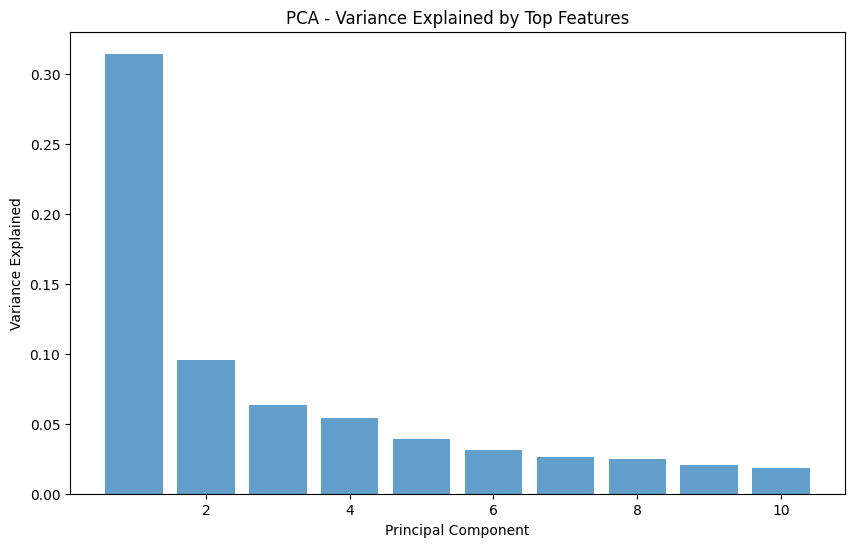

In [87]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Combine all embeddings into a single array
embeddings = np.vstack(features['word embeddings'].values)

# Perform PCA on the combined embeddings
def perform_pca(embeddings, n_components=10):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(embeddings)
    return principal_components, pca.explained_variance_ratio_

pca_results, explained_variance_ratios = perform_pca(embeddings, n_components=10)

# Add PCA-transformed embeddings to the features DataFrame
features['pca word embeddings'] = list(pca_results)

# Visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA - Variance Explained by Top Features')
plt.show()


In [89]:
features['pca word embeddings'].iloc[0].shape

(10,)

In [91]:
features.head()

,word_count,avg_word_length,.,JJ,NN,RBS,PDT,RBR,WDT,RP,...,DT,VBG,'',EX,neg,neu,pos,compound,word embeddings,pca word embeddings
0,613,4.438825,11,48,129,0,1,0,6,5,...,48,10,0,1,0.013,0.859,0.128,0.9955,"[0.017016187, -0.034937337, 0.14796308, -0.000...","[0.17055345, 0.28032002, -0.51442456, -0.48063..."
1,1118,4.510733,35,116,210,0,0,1,11,6,...,93,33,0,3,0.026,0.852,0.122,0.9988,"[0.10268941, -0.08198997, 0.27217576, 0.043742...","[-0.64036167, 0.46609712, -0.24843442, 0.22444..."
2,751,4.528628,31,78,155,0,2,4,6,6,...,59,21,0,0,0.020,0.874,0.105,0.9966,"[0.15770096, -0.117634885, 0.053557727, 0.0065...","[0.9803379, 0.1003539, -0.6206479, 0.17597574,..."
3,717,4.281729,36,58,137,0,0,1,1,4,...,60,22,0,1,0.027,0.842,0.131,0.9978,"[0.16491431, -0.16346881, 0.18370056, -0.02423...","[-0.011067633, 0.07448671, -0.4881233, -0.1114..."
4,645,4.688372,30,50,125,0,0,2,4,3,...,49,17,0,0,0.038,0.838,0.124,0.9945,"[0.05813729, -0.097823314, 0.14181888, -0.0148...","[-0.26494193, -0.26303858, -0.42509365, 0.1876..."


In [92]:
word_embeddings = features['pca word embeddings']


# Function to pad or truncate embeddings
def pad_or_truncate(embedding):
    embedding = np.array(embedding)
    return np.concatenate([embedding])

# Apply padding/truncation to all embeddings
padded_embeddings = word_embeddings.apply(lambda x: pad_or_truncate(x))

# Convert to feature matrix (2D numpy array)
pca_matrix = np.vstack(padded_embeddings)

print("Feature Matrix Shape:", pca_matrix.shape)

Feature Matrix Shape: (138, 10)


In [93]:
pca_df = pd.DataFrame(pca_matrix)

pca_df.corrwith(transcript_data['Overall'])

,0
0,0.131263
1,-0.105659
2,0.144061
3,-0.001381
4,0.080280
5,-0.005166
6,-0.103358
7,-0.026167
8,0.000730
9,-0.178080


Language Features Extracted:
- Syntactic Vectorization with CountVectorizer
- Syntactic Vectorization with TFIDF Vectorizer
- Word Count
- Average Word Length
- Part of Speech Tagging
- Sentiment Analysis with Vader
- Word Embedding with BERT
  
A total of 7 distinctive features.

The human readable features are: CountVectorizer because it is a count of the words throughout the interview, the Statistical Features, Part of Speech Tagging (with a little extra interpretation), and Sentiment Analysis with Vader.

Language feature selection part


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define the features and the target outcomes
X = features[['word count', 'avg word length', 'pos tagging', 'sentiment', 'word embeddings']]
y = outcomes  # Assuming 'outcomes' is a predefined variable containing the target outcomes

# Apply SelectKBest to extract the top k features
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support(indices=True)]

# Display the selected features and their scores
feature_scores = selector.scores_[selector.get_support()]
for feature, score in zip(selected_features, feature_scores):
    print(f"Feature: {feature}, Score: {score}")

# Discuss findings
# The selected features are the most relevant to the considered outcomes based on the ANOVA F-value.
# These features can provide actionable insights to the user by highlighting the most important aspects
# of the language used in the interviews. For example, if 'word count' is positively associated with
# successful outcomes, users can focus on increasing the length of their responses. Similarly, if
# 'sentiment' is negatively associated with successful outcomes, users can work on improving the
# positivity of their language.
